In [172]:
# reset notebook
%reset -f

In [1]:
# Import packages
import os
import numpy as np
import shutil
import matplotlib.pyplot as plt

(0.0, 3.301216044273e-12)

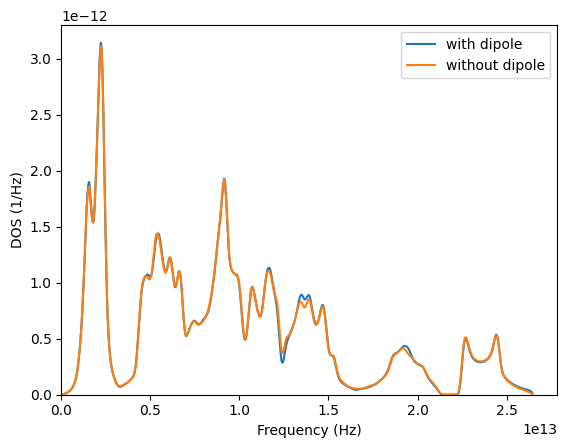

In [20]:
# Plot and compare the phonon DOS with and without the dipole correction

# Read in the data
with_dipole = np.loadtxt('with_dipole/vdos_4.00')
without_dipole = np.loadtxt('without_dipole/vdos_4.00')

# Plot the data
plt.plot(with_dipole[:,0], with_dipole[:,1], label='with dipole')
plt.plot(without_dipole[:,0], without_dipole[:,1], label='without dipole')
plt.xlabel('Frequency (Hz)')
plt.ylabel('DOS (1/Hz)')
plt.legend()
plt.xlim(0)
plt.ylim(0)         


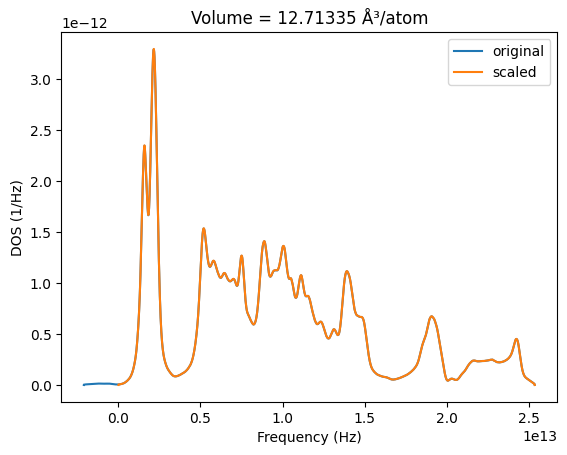

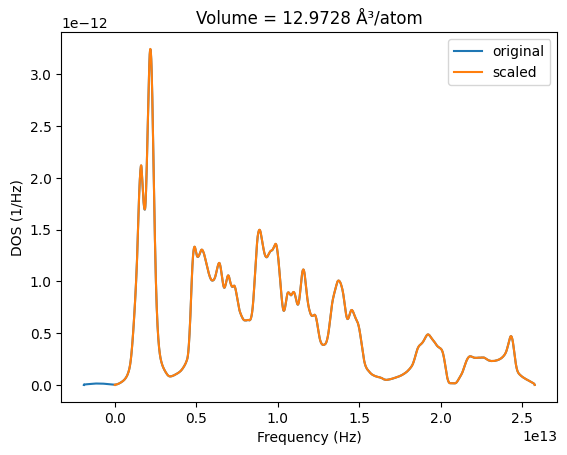

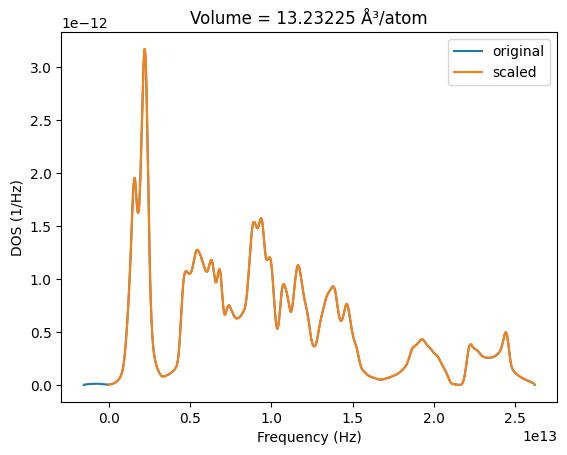

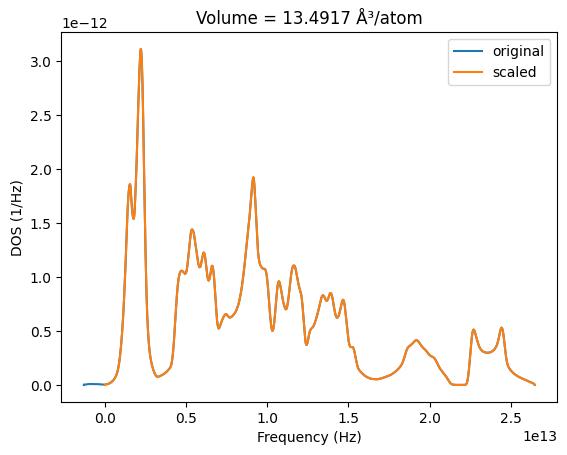

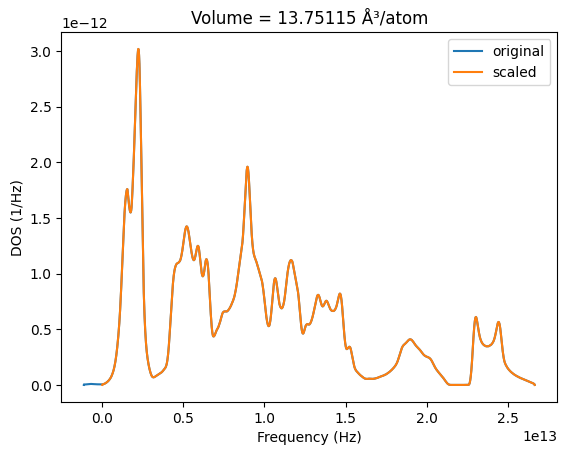

In [125]:
# Import packages
import os
import numpy as np
import shutil
import matplotlib.pyplot as plt

# Scale the area of the phonon DOS
# Specify the number of atoms you would like to scale the phonon DOS to
num_atoms = 5

# The area under the curve of the phonon DOS is normalized to ~ 3N in YPHON
num_atoms_3N = num_atoms * 3

# List all the files in the directory
directory = 'without_dipole/original'
file_list = os.listdir(directory)

# Keep only the file names which have volph in file_list
volph_files = [file for file in file_list if 'volph' in file]

# Keep only the file names which have vdos in file_list
vdos_files = [file for file in file_list if 'vdos' in file]

# Loop over the vdos files
i = 0
for file in vdos_files:
    data = np.loadtxt(directory + '/' + file)

    # Plot the phonon DOS
    plt.plot(data[:,0], data[:,1], label='original')
 
    # Remove the negative frequencies
    data = data[data[:,0] > 0]
    
    # Insert a zero frequency and zero DOS at the beginning of the array
    data = np.insert(data, 0, [0, 0], axis=0)
    
    # Calculate the area under the curve
    area = np.trapz(data[:,1], data[:,0])
    
    # Scale the area of the phonon DOS to 3N
    data[:,1] = data[:,1] * num_atoms_3N / area
    
    # Calculate the new area under the curve
    area = np.trapz(data[:,1], data[:,0])
    
    # Plot the scaled phonon DOS on the same plot
    plt.plot(data[:,0], data[:,1], label='scaled')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('DOS (1/Hz)')
    plt.legend()
    title = np.loadtxt(directory + '/' + volph_files[i], dtype=str)
    title = 'Volume = ' + title.item() + ' ' + 'Å³/atom'
    plt.title(title)
    plt.show()
    
    i += 1
    
    # Save the scaled phonon DOS to a folder called scaled_phonon_dos
    if not os.path.exists(directory + '/' + 'scaled_phonon_dos'):
        os.mkdir(directory + '/scaled_phonon_dos')
        
    np.savetxt(directory + '/scaled_phonon_dos/' + file, data)

# Move the scaled_phonon_dos folder one step back
shutil.move(directory + '/scaled_phonon_dos', directory + '/../scaled_phonon_dos')

# Copy all files that start with volph to the scaled_phonon_dos folder
for file in volph_files:
    shutil.copy(directory + '/' + file, directory + '/../scaled_phonon_dos')

In [108]:
def scale_phonon_dos(path, num_atoms, plot=False):
    
    # Keep track of the original path
    original_path = os.getcwd()
    
    # Collect all the vdos and volph files in the working path
    file_list = os.listdir(path)
    os.chdir(path)
    
    volph_files = [file for file in file_list if 'volph' in file]
    vdos_files = [file for file in file_list if 'vdos' in file]

    # Create a folder to save the scaled phonon DOS in the parent directory. If it already exists, delete it and create a new one
    parent_dir = os.path.dirname(path)
    dir_to_check = os.path.join(parent_dir, 'scaled_phonon_dos')

    if os.path.exists(dir_to_check):
        shutil.rmtree(dir_to_check)
        os.makedirs(dir_to_check) 
    
    # The area under the curve of the phonon DOS is normalized to ~ 3N in YPHON. We will scale our phonon DOS to 3N for the number of atoms, N, specified. 
    num_atoms_3N = num_atoms * 3
    
    # Loop over the phonon dos from the vdos files and scale them one-by-one
    i = 0
    for file in vdos_files:
        data = np.loadtxt(file)

        # Remove the negative frequencies
        data_new = data[data[:,0] > 0]
        
        # Insert a zero frequency and zero DOS at the beginning of the array
        data_new = np.insert(data_new, 0, [0, 0], axis=0)
        
        # Calculate the area under the curve of the phonon DOS
        area = np.trapz(data_new[:,1], data_new[:,0])
        
        # Scale the area under the curve of the phonon DOS to 3N
        data_new[:,1] = data_new[:,1] * num_atoms_3N / area
        
        # Calculate the new area under the curve of the scaled phonon DOS
        area = np.trapz(data_new[:,1], data_new[:,0])
   
        # Save the scaled phonon DOS to the scaled_phonon_dos folder
        np.savetxt(os.path.join(dir_to_check, file), data)
        
        # Plot the original and scaled phonon DOS on the same plot for comparison
        if plot == True:
            plt.plot(data[:,0], data[:,1], label='original')
            plt.plot(data_new[:,0], data_new[:,1], label='scaled')
            plt.xlabel('Frequency (Hz)')
            plt.ylabel('DOS (1/Hz)')
            plt.legend()
            title = np.loadtxt(volph_files[i], dtype=str)
            title = 'Volume = ' + title.item() + ' ' + 'Å³/atom'
            plt.title(title)
            plt.show()
        
        i += 1

    # Copy all files that start with volph to the scaled_phonon_dos folder
    for file in volph_files:
        shutil.copy(file, dir_to_check)
    
    # Return to original path
    os.chdir(original_path)
    
    # TODO: Reduce volph_files[i] to just two decimal places

In [109]:
scale_phonon_dos('without_dipole/original', 5)

14.999999999999996
14.999999999999998
15.000000000000002
15.0
15.0


In [107]:
#scale_phonon_dos('without_dipole/original', 5)
# Check the current working directory

os.getcwd()

'c:\\Users\\nigel\\OneDrive\\Desktop\\VS Code\\pyzentropy\\PyZentropy'

In [102]:
os.chdir('../..')

In [13]:
# Get the current working directory
cwd = os.getcwd()
print(cwd)
# Get the parent directory
parent_dir = os.path.dirname(cwd)
print(parent_dir)

# Define the directory to check
dir_to_check = os.path.join(parent_dir, 'scaled_phonon_dos')
print(dir_to_check)

# Check if the directory exists and create it if it doesn't
if not os.path.exists(dir_to_check):
    os.makedirs(dir_to_check)

c:\Users\nigel\OneDrive\Desktop\VS Code\pyzentropy\PyZentropy\without_dipole\original
c:\Users\nigel\OneDrive\Desktop\VS Code\pyzentropy\PyZentropy\without_dipole
c:\Users\nigel\OneDrive\Desktop\VS Code\pyzentropy\PyZentropy\without_dipole\scaled_phonon_dos


In [126]:
# Import packages
import os
import numpy as np
import shutil
import matplotlib.pyplot as plt

# Harmonic phonon calculation

directory = 'without_dipole/scaled_phonon_dos'
num_atoms = 5; # Number of atoms 
eos_type = 2; # EOS type: 1-mBM; 2-BM; 3-LOG
eos_rank = 2; # EOS rank: 3, 4, or 5

# Temperature range
T_min = 10
T_max = 1000
dT = 10
T = np.arange(T_min, T_max + dT, dT)
num_T = len(T)

# Read the volumes
volph_files = [file for file in file_list if 'volph' in file]
for file in volph_files:
    # Read in the volume and append it to the numpy array
    volume = np.loadtxt(directory + '/' + file)
    volume = volume.item()
    # Collect the volumes in a numpy array
    if 'volumes' in locals():
        volumes = np.append(volumes, volume)
    else:
        volumes = np.array([volume])

# Boltzmann constant and Planck's constant
kb = 1.380662e-23 # J/K
kb = kb / (1.6021892e-19) # eV/K
planck = 6.626176e-34 # Js
planck = planck / (1.6021892e-19) # eVs

# Read the scaled phonon DOS
    
vdos_files = [file for file in file_list if 'vdos' in file]
for file in vdos_files:
    vib_properties = []
    phonon_dos = np.loadtxt(directory + '/' + file)
    
    # Extract frequency and dos from phonon_dos
    frequency = phonon_dos[:, 0]  # Hz
    dos = phonon_dos[:, 1]  # 1/Hz
    
    # df, mid_f, and mid_dos are used to evaluate the integrals
    df = frequency[1:] - frequency[:-1]

    # Use the middle value for the frequency in the integral
    mid_f = (frequency[1:] + frequency[:-1]) * 0.5

    # Use the middle value for the DOS in the integral
    mid_dos = (dos[1:] + dos[:-1]) * 0.5
    
    # If abs(mid_f) < 1e-39, set it to 1e-39
    mid_f[np.abs(mid_f) < 1e-39] = 1e-39
    
    # Loop over temperature range
    for T in np.arange(T_min, T_max + dT, dT):
        constant = (planck * mid_f) / (2 * kb * T)

        A = df * mid_dos * np.log(2 * np.sinh(constant))
        free_energy = kb * T * np.sum(A)  # eV

        A = df * mid_dos * (planck * mid_f) * np.cosh(constant) / np.sinh(constant)
        internal_energy = 0.5 * np.sum(A)  # eV

        A = constant * np.cosh(constant) / np.sinh(constant) - np.log(2 * np.sinh(constant))
        entropy = kb * np.sum(df * mid_dos * A)  # eV/K

        A = (1 / np.sinh(constant))**2
        cv = kb * np.sum(df * mid_dos * constant**2 * A)  # eV/K

        vib_properties.append([T, free_energy, internal_energy, entropy, cv])

    # Convert list to numpy array
    vib_properties = np.vstack(vib_properties)
    #print((vib_properties[:, 1] / num_atoms)[:, np.newaxis])
    
    # Collect the vibrational properties in a numpy array
    if 'free_energy_all' in locals():
        free_energy_all = np.hstack((free_energy_all, (vib_properties[:, 1] / num_atoms)[:, np.newaxis]))
    else:
        free_energy_all = (vib_properties[:, 1] / num_atoms)[:, np.newaxis]
    
    if 'entropy_all' in locals():
        entropy_all = np.hstack((entropy_all, (vib_properties[:, 3] / num_atoms)[:, np.newaxis]))
    else:
        entropy_all = (vib_properties[:, 3] / num_atoms)[:, np.newaxis]
        
    if 'cv_all' in locals():
        cv_all = np.hstack((cv_all, (vib_properties[:, 4] / num_atoms)[:, np.newaxis]))
    else:
        cv_all = (vib_properties[:, 4] / num_atoms)[:, np.newaxis]
     
    #entropy = np.append(entropy, vib_properties[:, 3] / num_atoms)
    #cv = np.append(cv, vib_properties[:, 4] / num_atoms)
    
print(cv_all)
# print the shape of free_energy_all
print(cv_all.shape)



[[1.31e-06 1.36e-06 1.42e-06 1.50e-06 1.83e-06]
 [1.24e-05 1.24e-05 1.25e-05 1.27e-05 1.34e-05]
 [2.56e-05 2.56e-05 2.58e-05 2.60e-05 2.69e-05]
 [3.66e-05 3.68e-05 3.71e-05 3.75e-05 3.85e-05]
 [4.66e-05 4.71e-05 4.76e-05 4.81e-05 4.92e-05]
 [5.67e-05 5.73e-05 5.79e-05 5.85e-05 5.98e-05]
 [6.69e-05 6.77e-05 6.83e-05 6.90e-05 7.04e-05]
 [7.72e-05 7.80e-05 7.86e-05 7.94e-05 8.08e-05]
 [8.74e-05 8.82e-05 8.88e-05 8.96e-05 9.10e-05]
 [9.73e-05 9.82e-05 9.87e-05 9.95e-05 1.01e-04]
 [1.07e-04 1.08e-04 1.08e-04 1.09e-04 1.10e-04]
 [1.16e-04 1.17e-04 1.17e-04 1.18e-04 1.19e-04]
 [1.25e-04 1.25e-04 1.26e-04 1.26e-04 1.28e-04]
 [1.33e-04 1.33e-04 1.34e-04 1.34e-04 1.36e-04]
 [1.40e-04 1.41e-04 1.41e-04 1.42e-04 1.43e-04]
 [1.48e-04 1.48e-04 1.48e-04 1.49e-04 1.50e-04]
 [1.54e-04 1.55e-04 1.55e-04 1.55e-04 1.56e-04]
 [1.60e-04 1.61e-04 1.61e-04 1.61e-04 1.62e-04]
 [1.66e-04 1.66e-04 1.66e-04 1.67e-04 1.68e-04]
 [1.71e-04 1.72e-04 1.72e-04 1.72e-04 1.73e-04]
 [1.76e-04 1.77e-04 1.77e-04 1.77e-04 1.

[5.85e-02 5.85e-02 5.84e-02 5.82e-02 5.80e-02 5.76e-02 5.72e-02 5.67e-02
 5.60e-02 5.53e-02 5.45e-02 5.35e-02 5.25e-02 5.14e-02 5.02e-02 4.89e-02
 4.75e-02 4.60e-02 4.44e-02 4.28e-02 4.10e-02 3.92e-02 3.73e-02 3.53e-02
 3.32e-02 3.10e-02 2.88e-02 2.65e-02 2.41e-02 2.17e-02 1.92e-02 1.66e-02
 1.39e-02 1.12e-02 8.45e-03 5.61e-03 2.71e-03 -2.49e-04 -3.27e-03
 -6.35e-03 -9.48e-03 -1.27e-02 -1.59e-02 -1.92e-02 -2.26e-02 -2.60e-02
 -2.94e-02 -3.29e-02 -3.65e-02 -4.01e-02 -4.37e-02 -4.74e-02 -5.12e-02
 -5.49e-02 -5.88e-02 -6.26e-02 -6.66e-02 -7.05e-02 -7.45e-02 -7.85e-02
 -8.26e-02 -8.68e-02 -9.09e-02 -9.51e-02 -9.93e-02 -1.04e-01 -1.08e-01
 -1.12e-01 -1.17e-01 -1.21e-01 -1.26e-01 -1.30e-01 -1.35e-01 -1.39e-01
 -1.44e-01 -1.48e-01 -1.53e-01 -1.58e-01 -1.62e-01 -1.67e-01 -1.72e-01
 -1.77e-01 -1.82e-01 -1.86e-01 -1.91e-01 -1.96e-01 -2.01e-01 -2.06e-01
 -2.11e-01 -2.16e-01 -2.21e-01 -2.27e-01 -2.32e-01 -2.37e-01 -2.42e-01
 -2.47e-01 -2.52e-01 -2.58e-01 -2.63e-01 -2.68e-01]
[  10   20   30   40  

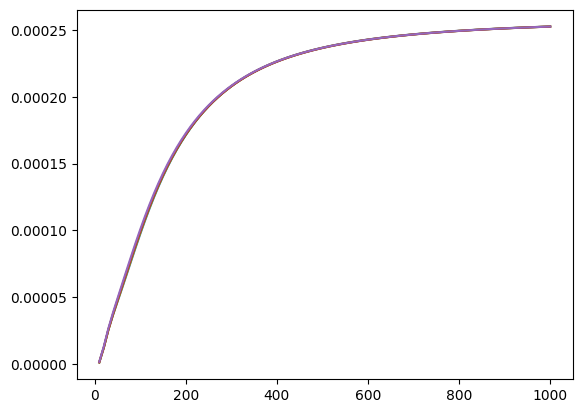

In [127]:
# Plot entropy_all vs T defined previously
import matplotlib.pyplot as plt
T = np.arange(T_min, T_max + dT, dT)
print(free_energy_all[:, 0])
print(T)
plt.plot(T, cv_all[:, 0])
plt.plot(T, cv_all[:, 1])
plt.plot(T, cv_all[:, 2])
plt.plot(T, cv_all[:, 3])
plt.plot(T, cv_all[:, 4])

# Make the y-axis in scientific notation
#plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

# Set the y-limits
#plt.ylim(0, 0.0003)

In [112]:
import numpy as np

# Set the print options to use scientific notation
np.set_printoptions(formatter={'float': '{:.2e}'.format})

# Now when you print cv_all, it will be displayed in scientific notation
print(cv_all)


[[2.35e-05 2.34e-05 2.36e-05 2.39e-05 2.50e-05]
 [6.08e-05 6.12e-05 6.18e-05 6.23e-05 6.35e-05]
 [8.77e-05 8.91e-05 9.00e-05 9.10e-05 9.28e-05]
 [1.18e-04 1.19e-04 1.20e-04 1.21e-04 1.23e-04]
 [1.48e-04 1.49e-04 1.50e-04 1.51e-04 1.52e-04]
 [1.75e-04 1.76e-04 1.77e-04 1.77e-04 1.79e-04]
 [1.99e-04 1.99e-04 1.99e-04 2.00e-04 2.01e-04]
 [2.18e-04 2.18e-04 2.18e-04 2.18e-04 2.19e-04]
 [2.33e-04 2.33e-04 2.33e-04 2.33e-04 2.33e-04]
 [2.45e-04 2.45e-04 2.45e-04 2.44e-04 2.45e-04]
 [2.55e-04 2.54e-04 2.54e-04 2.54e-04 2.54e-04]
 [2.62e-04 2.62e-04 2.61e-04 2.61e-04 2.61e-04]
 [2.68e-04 2.67e-04 2.67e-04 2.66e-04 2.66e-04]
 [2.72e-04 2.72e-04 2.71e-04 2.71e-04 2.70e-04]
 [2.75e-04 2.75e-04 2.74e-04 2.74e-04 2.74e-04]
 [2.78e-04 2.77e-04 2.77e-04 2.76e-04 2.76e-04]
 [2.79e-04 2.79e-04 2.78e-04 2.78e-04 2.78e-04]
 [2.80e-04 2.80e-04 2.80e-04 2.79e-04 2.79e-04]
 [2.81e-04 2.81e-04 2.80e-04 2.80e-04 2.80e-04]
 [2.82e-04 2.81e-04 2.81e-04 2.80e-04 2.80e-04]
 [2.82e-04 2.81e-04 2.81e-04 2.81e-04 2.

In [ ]:
# Make sure the values are exactly the same as the MATLAB code before you even move on. Looks correct for now. Keep checking and modifying.
# Spend at least an hour a day on this if you can. 